# Módulo 2 Análisis y Reporte sobre el desempeño del modelo

En este proyecto, se propone crear un modelo de clasificación utilizando el algoritmo Random Forest. Para llevar a cabo este proceso, optamos por utilizar Python como lenguaje de programación y el framework de sklearn, ya que es conocido por su facilidad de uso y una amplia gama de bibliotecas disponibles para la manipulación y análisis de datos.

#Dataset
Bob ha iniciado su propia empresa de telefonía móvil. Quiere dar una dura lucha a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de la telefonía móvil no se pueden simplemente dar por sentado las cosas. Para solucionar este problema recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere descubrir alguna relación entre las características de un teléfono móvil (por ejemplo: RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Entonces necesita tu ayuda para resolver este problema.

En este problema no es necesario predecir el precio real, sino un rango de precios que indique qué tan alto es el precio.

El dataset que estaremos utilizando es el siguiente: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

Los archivos del conjunto de datos están adjuntados al repositorio cómo train móvil y test_movil



## Importar módulos

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler # Funcion para escalar datos
import graphviz
from sklearn.tree import export_graphviz

## Cargar datos

In [9]:
# Cargar los archivos de datos
train_df = pd.read_csv('train_movil.csv')
test_df = pd.read_csv('test_movil.csv')

train_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## Separación de datos en subconjuntos

Para entrenar al modelo se dividen los datos en los subconjuntos de entrenamiento, vaidación y prueba en una proporción de sesenta, veinte y veinte respectivamente. Para realizar este división se utiliza la función **train_test_split**, la cual selecciona las muestras para cada subconjunto aleatoriamente.

Además, con el propósito de evitar un sesgo en el modelo se **escalan** los datos de los subconjuntos de entrenamiento, validación y prueba. Para esto se utiliza el módulo de **preprocesamiento de sklearn**.

In [10]:
# Separar las características (X) y las etiquetas (y) del conjunto de datos de entrenamiento
X = train_df.drop('price_range', axis=1)  # Dejar fuera la columna 'price_range'
y = train_df['price_range']  # Etiquetas 'price_range'

# Dividir el conjunto de datos de entrenamiento en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [55]:
# Limitar max_features a la raíz cuadrada del número total de características
max_features = int(np.sqrt(X_train.shape[1]))

# Establecer el valor de min_impurity_decrease el valor dado esta configurando debido a una iteracion que se hizo posteriormente
min_impurity_decrease = 0.02

# Crear un clasificador de Random Forest
randomForest = RandomForestClassifier(min_impurity_decrease=min_impurity_decrease, max_features=max_features, random_state=42)

# Define una cuadrícula de hiperparámetros para buscar los mejores valores
param_grid = {
    'n_estimators': [50, 100], #Numero de arboles
    'max_depth': [3, 4, 5, 10], #Profunidad de arbol
    'min_samples_split': [5, 10, 20], #Numero de divison de nodos
}

#Busqueda para encontrar los parametros optimos
grid_search = GridSearchCV(estimator=randomForest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

param_optimo = grid_search.best_params_
modelo_optimo = grid_search.best_estimator_
print("Mejores hiperparámetros:", param_optimo)

# Entrenar el modelo con los mejores hiperparámetros encontrados
modelo_optimo.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de validación utilizando el modelo optimizado
y_pred_valid = modelo_optimo.predict(X_valid)

# Calcular la precisión en el conjunto de validación con los mejores hiperparámetros
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"Precisión en el conjunto de validación con los mejores hiperparámetros: {accuracy_valid * 100:.2f}%")


# Preparar el conjunto de datos de prueba (eliminar la columna 'id' si es necesario)
X_test = test_df.drop('id', axis=1)

# Hacer predicciones en el conjunto de datos de prueba
y_pred_test = modelo_optimo.predict(X_test)

#Imprimir los resultados en los datos prueba
print("Predicciones en el conjunto de prueba:")
print(y_pred_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores hiperparámetros: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}
Precisión en el conjunto de validación con los mejores hiperparámetros: 75.00%
Predicciones en el conjunto de prueba:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 1 1 3 2 1 3 1 2 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 3 2 0 2 0 0 0 1 1 2 1 2 2 0 2 1 3 1 3 1 1 3 3 3 1 1 1 1 1 2 1 1 1 1 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 1 2 0 2 1 0 2 1 3 1 0 0 2 1 2 0 1 2 3 3
 3 1 3 3 3 3 1 3 0 0 3 2 1 1 0 3 2 3 1 0 1 1 2 3 1 1 0 3 2 1 3 2 2 3 3 3 2
 2 3 3 3 0 1 2 2 3 3 3 3 2 2 3 3 2 3 1 0 3 0 0 0 1 0 0 1 1 0 1 2 0 0 1 0 2
 2 2 1 0 0 0 0 0 3 1 1 2 1 2 3 1 2 3 3 3 1 2 0 0 1 1 2 1 2 3 3 1 2 0 3 2 2
 2 0 0 1 0 3 0 1 0 2 1 1 3 0 3 0 3 1 1 0 0 2 1 2 2 3 1 1 3 0 0 3 3 3 1 3 1
 0 3 2 1 3 3 3 3 1 0 1 1 3 1 1 3 1 0 3 1 1 2 0 0 3 2 3 2 2 1 3 2 2 3 2 2 1
 1 1 2 3 1 0 0 3 0 3 1 1 1 0 1 3 1 3 1 2 1 2 1 0 0 1 3 1 0 0 0 3 1 1 3 3 1
 3 3 2 3 1 3 3 2 2 3 3 3 0 3 1 3 1 3 1 3 3 0 1 1 3 1 3 1 3 

## Análisis de desempeño

### Curva aprendizaje

Sobreajuste (Overfitting): El modelo se ajusta demasiado a los datos de entrenamiento.


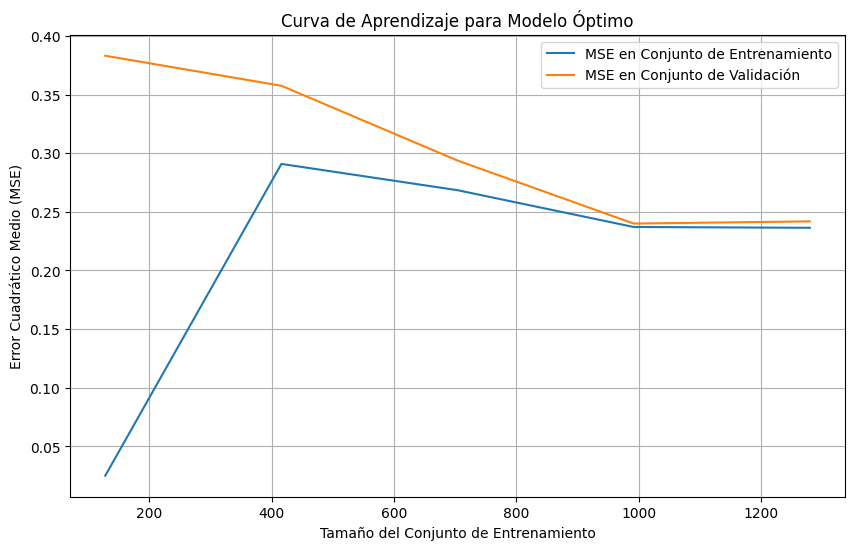

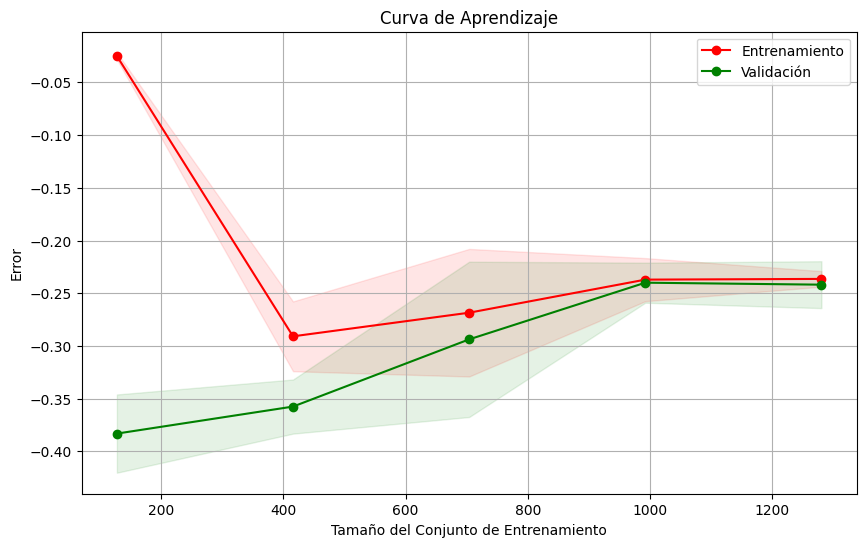

In [56]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Error" if scoring == 'neg_mean_squared_error' else "Precisión")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación")

    plt.legend(loc="best")
    return plt

def bias_variance_diagnosis(X, y, estimator, title):
    train_sizes, train_errors, val_errors = learning_curve(
        estimator, X, y, cv=5, scoring='neg_mean_squared_error')

    train_errors = -np.mean(train_errors, axis=1)
    val_errors = -np.mean(val_errors, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='MSE en Conjunto de Entrenamiento')
    plt.plot(train_sizes, val_errors, label='MSE en Conjunto de Validación')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Error Cuadrático Medio (MSE)')
    plt.title('Curva de Aprendizaje para ' + title)
    plt.legend()
    plt.grid()

def evaluate_bias_variance(estimator, X_train, y_train, X_valid, y_valid):
    estimator.fit(X_train, y_train)

    # Predicciones en el conjunto de entrenamiento y validación
    y_train_pred = estimator.predict(X_train)
    y_valid_pred = estimator.predict(X_valid)

    # Cálculo de errores MSE en entrenamiento y validación
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)

    return mse_train, mse_valid

# Evaluar sesgo y varianza
bias_variance_diagnosis(X_train, y_train, modelo_optimo, "Modelo Óptimo")

# Evaluar sesgo y varianza y obtener errores MSE
mse_train, mse_valid = evaluate_bias_variance(modelo_optimo, X_train, y_train, X_valid, y_valid)

# Mostrar la curva de aprendizaje
plot_learning_curve(modelo_optimo, "Curva de Aprendizaje", X_train, y_train, scoring='neg_mean_squared_error')
plt.show()

### Resultados del subconjunto de prueba

Métricas en el conjunto de prueba:
Accuracy score: 0.761875


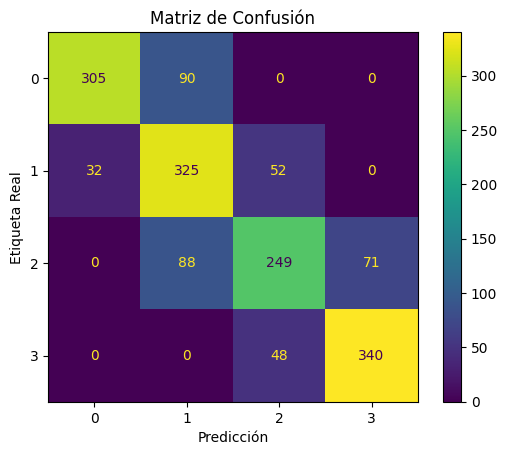

'decision_tree.pdf'

In [71]:
# Predecir los valores en el conjunto de prueba
y_pred = modelo_optimo.predict(X_train)

# Calcular las métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
print("Accuracy score:", accuracy_score(y_train, y_pred))


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión como una imagen
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

# Visualizar un árbol del random forest
estimator = modelo_optimo.estimators_[0]  # Seleccionar el primer árbol
myTreeData = export_graphviz(estimator, out_file=None,
                            feature_names= X_test.columns,
                            class_names=['Not Survived', 'Survived'],
                            filled=True, rounded=True, special_characters=True)

graphData = graphviz.Source(myTreeData)
graphData.view(filename='decision_tree')